In [2]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

Dimensions of the image: 316x474x3


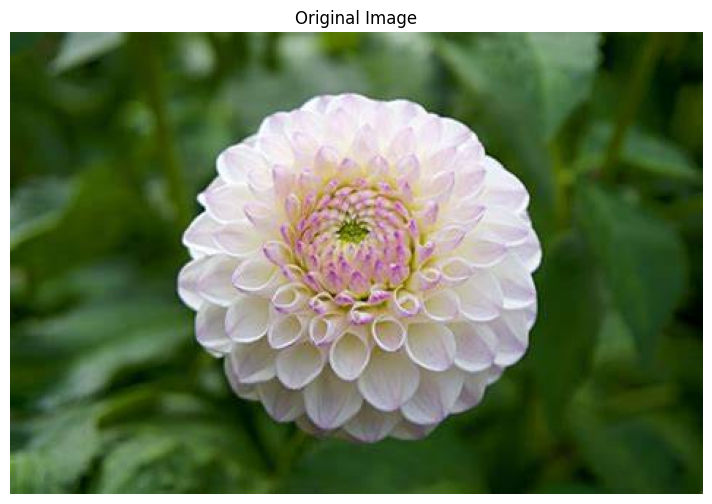

In [3]:


# URL of the image
image_url = "https://th.bing.com/th/id/OIP.YEe7jjvj3XtaZgPXX7JJ7QHaE8?rs=1&pid=ImgDetMain"

# Download the image
response = requests.get(image_url)
if response.status_code == 200:
    ImJPG = Image.open(BytesIO(response.content))  # Open image from bytes
    ImJPG = np.array(ImJPG)  # Convert to NumPy array

    # Get image dimensions
    m, n, l = ImJPG.shape
    print(f"Dimensions of the image: {m}x{n}x{l}")

    # Display the original image
    plt.figure(figsize=(10, 6))
    plt.imshow(ImJPG)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
else:
    print("Failed to download the image.")


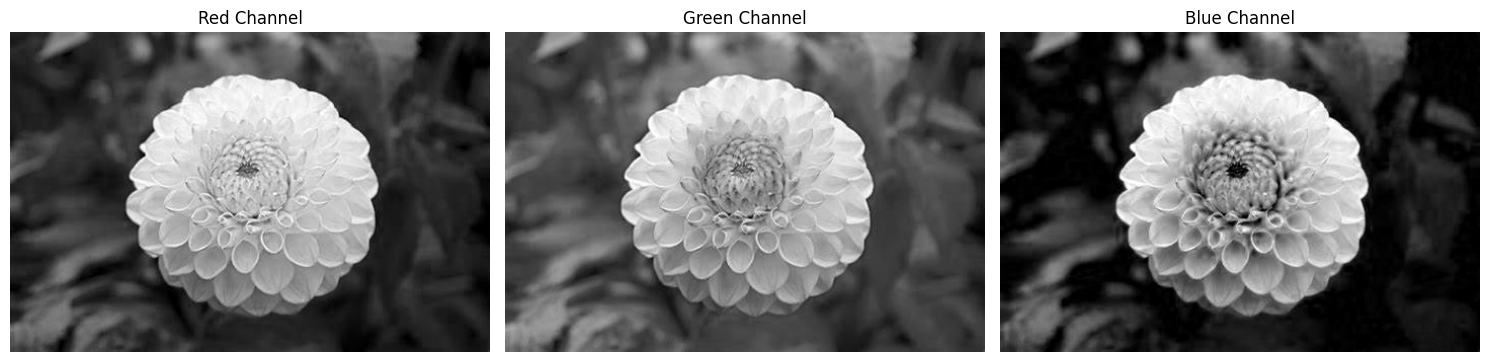

In [4]:
# Extract individual color channels
redChannel = ImJPG[:, :, 0]
greenChannel = ImJPG[:, :, 1]
blueChannel = ImJPG[:, :, 2]

# Display color channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
channels = [redChannel, greenChannel, blueChannel]
titles = ['Red Channel', 'Green Channel', 'Blue Channel']

for ax, channel, title in zip(axes, channels, titles):
    ax.imshow(channel, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

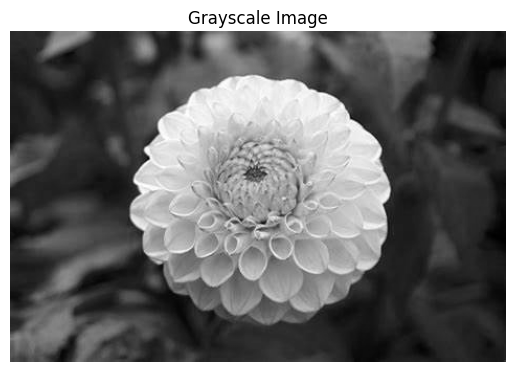

In [5]:
# Define the GrayMatrix filter
GrayMatrix = np.array([[1/3, 1/3, 1/3],
                       [1/3, 1/3, 1/3],
                       [1/3, 1/3, 1/3]])

# Initialize ImJPG_Gray with the same shape as ImJPG
ImJPG_Gray = np.zeros_like(ImJPG, dtype=np.uint8)

# Convert each pixel to grayscale
for i in range(m):
    for j in range(n):
        PixelColor = ImJPG[i, j, :].reshape(3, 1)
        ImJPG_Gray[i, j, :] = np.dot(GrayMatrix, PixelColor).flatten().astype(np.uint8)

# Display the grayscale image
plt.figure()
plt.imshow(ImJPG_Gray)
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

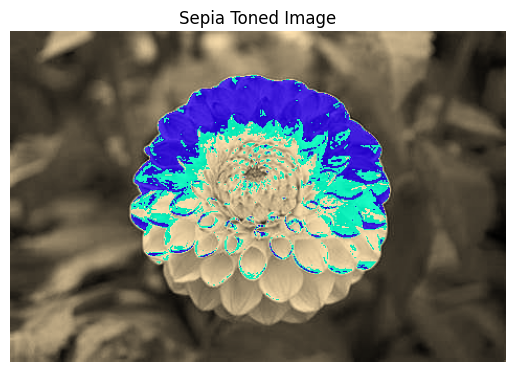

In [6]:
# Define the SepiaMatrix filter
SepiaMatrix = np.array([[0.393, 0.769, 0.189],
                        [0.349, 0.686, 0.168],
                        [0.272, 0.534, 0.131]])

# Initialize ImJPG_Sepia with the same shape as ImJPG
ImJPG_Sepia = np.zeros_like(ImJPG, dtype=np.uint8)

# Convert each pixel to sepia tone
for i in range(m):
    for j in range(n):
        PixelColor = ImJPG[i, j, :].reshape(3, 1)
        ImJPG_Sepia[i, j, :] = np.dot(SepiaMatrix, PixelColor).flatten().astype(np.uint8)

# Display the sepia toned image
plt.figure()
plt.imshow(ImJPG_Sepia)
plt.title('Sepia Toned Image')
plt.axis('off')
plt.show()

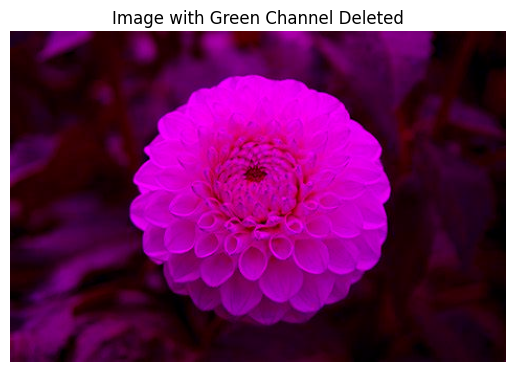

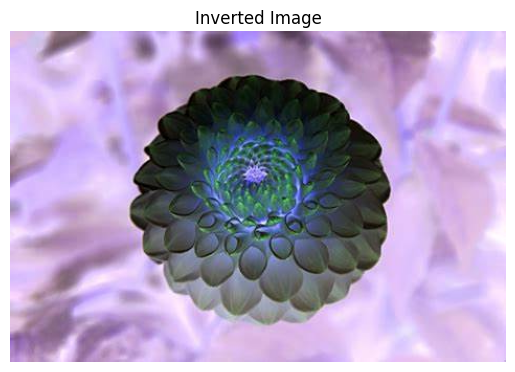

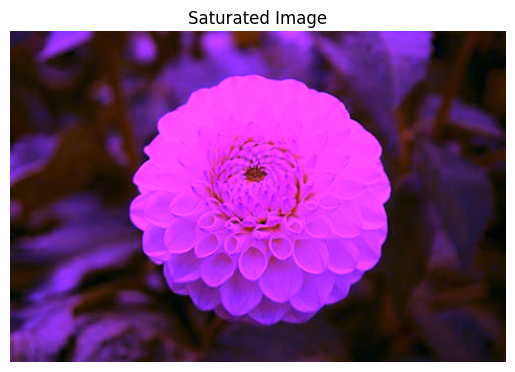

In [7]:
# Delete Green Channel
DeleteGreenMatrix = np.array([[1, 0, 0],
                               [0, 0, 0],
                               [0, 0, 1]])

ImJPG_DeleteGreen = np.zeros_like(ImJPG, dtype=np.uint8)
for i in range(m):
    for j in range(n):
        PixelColor = ImJPG[i, j, :].reshape(3, 1)
        ImJPG_DeleteGreen[i, j, :] = np.dot(DeleteGreenMatrix, PixelColor).flatten().astype(np.uint8)

plt.figure()
plt.imshow(ImJPG_DeleteGreen)
plt.title('Image with Green Channel Deleted')
plt.axis('off')
plt.show()

# Color Inversion
ImJPG_Invert = 255 - ImJPG
plt.figure()
plt.imshow(ImJPG_Invert)
plt.title('Inverted Image')
plt.axis('off')
plt.show()

# Color Saturation
SaturateMatrix = np.array([[1.2, 0, 0],
                            [0, 0.35, 0],
                            [0, 0, 2]])

ImJPG_Saturate = np.dot(ImJPG.astype(float), SaturateMatrix)
ImJPG_Saturate = np.clip(ImJPG_Saturate, 0, 255).astype(np.uint8)

plt.figure()
plt.imshow(ImJPG_Saturate)
plt.title('Saturated Image')
plt.axis('off')
plt.show()

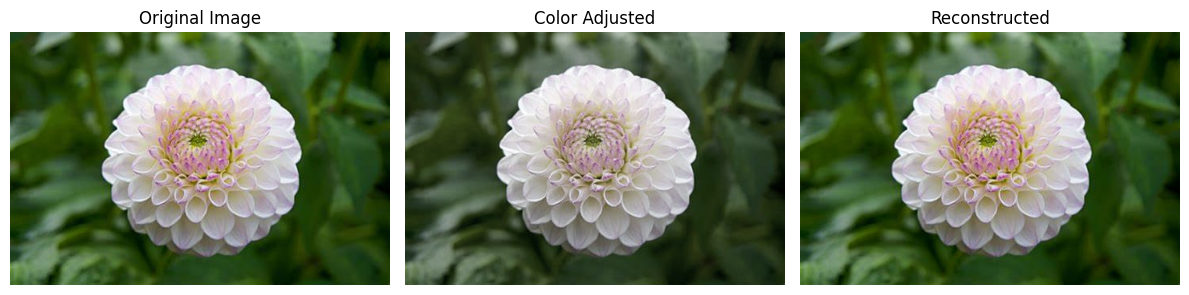

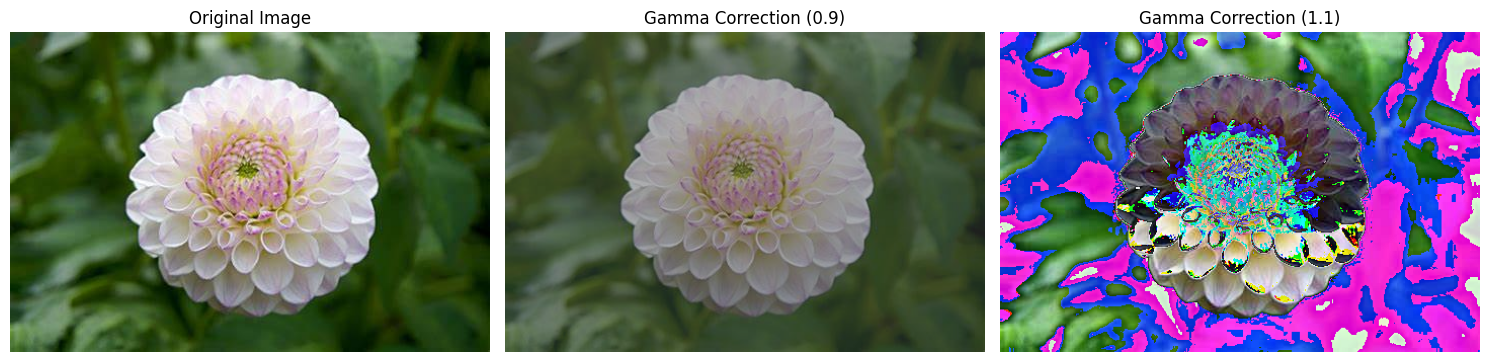

In [8]:
# Color Adjustment and Invertibility
UserMatrix = np.array([[0.7, 0.15, 0.15],
                       [0.15, 0.7, 0.15],
                       [0.15, 0.15, 0.7]])

UserMatrix_inv = np.linalg.inv(UserMatrix)

# Apply transformations
ImJPG_User = np.dot(ImJPG.astype(float), UserMatrix)
ImJPG_User = np.clip(ImJPG_User, 0, 255).astype(np.uint8)

# Attempt to recover original image
ImJPG_User_original = np.dot(ImJPG_User.astype(float), UserMatrix_inv).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_User)
plt.title('Color Adjusted')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_User_original)
plt.title('Reconstructed')
plt.axis('off')

plt.tight_layout()
plt.show()

# Gamma Correction
ImJPG_Gamma1 = np.uint8(np.power(ImJPG.astype(float), 0.9)) + 30
ImJPG_Gamma2 = np.uint8(np.power(ImJPG.astype(float), 1.1)) - 50

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Gamma1)
plt.title('Gamma Correction (0.9)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Gamma2)
plt.title('Gamma Correction (1.1)')
plt.axis('off')

plt.tight_layout()
plt.show()